EMAIL SPAM DETECTION

NEEDED LIBRARIES

In [1]:
import numpy as np  # py lib used for numerical computations, maily dealing with multi-dimensional arrays.
import pandas as pd  # py lib used for data manipulation and analysis. 
import matplotlib.pyplot as plt  # py lib used for data visualization.
import seaborn as sns  # py lib used for data visualization, based on matplotlib.
from sklearn.model_selection import train_test_split  # a machine learning lib in python : tts function used to split your dataset into training and testing sets.  
from sklearn.feature_extraction.text import TfidfVectorizer  # feature extraction - identifying and extracting relevant features from raw data, TfidfVectorizer - transforms text to feature vectors that can be used as input estimator.
from sklearn.linear_model import LogisticRegression  # for our first model build we are using logistic regression model, LR - used for binary classification tasks.
from sklearn.metrics import accuracy_score  # performance metrics - accuracy of the model.

LOADING DATASET

In [2]:
df = pd.read_csv('maildata.csv')
print(df)  # the whole dataset

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [3]:
df.head(5)  # first 5 rows of the dataset 

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.tail(5)  # last 5 rows of the dataset

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


DATA CLEANING, TRANSFORMATION AND EDA (EXPLORATORY DATA ANALYSIS)

In [5]:
df.info()  # provides a summary of the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.isnull().sum()  # checking for null values, and if any null values are present then we process the dataset to have only non-null values 

Category    0
Message     0
dtype: int64

In [7]:
df.shape  # checking for the dimensions of the dataset 

(5572, 2)

In [8]:
df.groupby('Category').size()  # checking for the classes in the dataset 

Category
ham     4825
spam     747
dtype: int64

<Axes: xlabel='Category'>

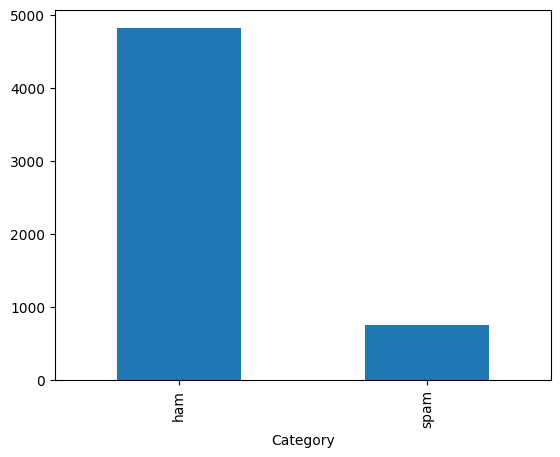

In [10]:
# Bar plot
df['Category'].value_counts().plot(kind='bar')  # plotting the classes in the dataset

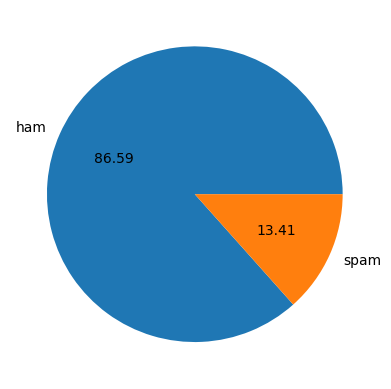

In [11]:
# Pie graph
plt.pie(df['Category'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

NOTES: THE ABOVE DATASET IS IMBALANCED. ALMOST 4/5th OF THE DATASET IS MADE UP OF HAM.

In [10]:
# encoding 
# replacing the values of the column 'Category', where 0 -> spam and 1 -> ham 
df.loc[df['Category'] == 'spam', 'Category', ] = 0  # .loc used to locate rows where the condition is true
df.loc[df['Category'] == 'ham', 'Category', ] = 1

In [10]:
X = df['Message']  # features 
y = df['Category']  # target variable 

In [12]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [13]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object
